In [56]:
from utils import dataset
import yaml
import json
from utils.HelperFunctions import visualise_data
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from PIL import Image
import torchvision.transforms as transforms
from utils.augmentations import RandAugment

<Figure size 1440x720 with 0 Axes>

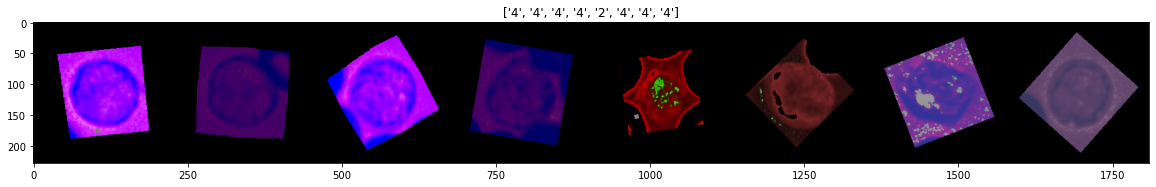

In [2]:
train_dataloader, val_dataloader = dataset.dataloader(
    "data",
    "0",
    "Purple",
    batch_size=8,
    workers=1,
    n=2,
    m=5,
)
plot = visualise_data(train_dataloader, ['0','1','2','3','4'], std=0, mean=0)
# plt.savefig(f"test.png", bbox_inches="tight")

In [2]:
fold = '0'
df = pd.read_csv(f'data/classification/val_{fold}.csv')

In [ ]:
def visualise_data(data_loader, classes, std=0, mean=0):
    plt.figure(figsize=(20, 10))
    images, labels = next(iter(data_loader))
    out = torchvision.utils.make_grid(images[0:8])
    out = out.numpy().transpose((1, 2, 0))
    if mean:
        out_pre = out * np.array(std) + np.array(mean)
        img1 = plt.imshow(np.clip(out_pre, 0, 1))
        plt.show()

    out_aug = out
    plt.figure(figsize=(20, 10))
    plt.title([classes[x] for x in labels[:8].numpy()])
    img2 = plt.imshow(np.clip(out_aug, 0, 1))
    return img2

In [45]:
Basophil = ["C:/FYP/hematology/data/classification/Fluor/Basophil/35-0-1-2690-974.png","C:/FYP/hematology/data/classification/Red/Basophil/35-0-2-2690-974.png","C:/FYP/hematology/data/classification/Green/Basophil/35-0-3-2690-974.png", "C:/FYP/hematology/data/classification/Purple/Basophil/35-0-4-2690-974.png"]
Eosinophil = ["C:/FYP/hematology/data/classification/Fluor/Eosonophil/1069-0-1-1735-644.png","C:/FYP/hematology/data/classification/Red/Eosonophil/1069-0-2-1737-655.png","C:/FYP/hematology/data/classification/Green/Eosonophil/1069-0-3-1734-650.png","C:/FYP/hematology/data/classification/Purple/Eosonophil/1069-0-4-1735-641.png"]
Lymphocyte = ["C:/FYP/hematology/data/classification/Fluor/Lymphocyte/1004-1-1-792-1898.png","C:/FYP/hematology/data/classification/Red/Lymphocyte/1004-1-2-806-1905.png","C:/FYP/hematology/data/classification/Green/Lymphocyte/1004-1-3-798-1900.png","C:/FYP/hematology/data/classification/Purple/Lymphocyte/1004-1-4-788-1908.png"]
Monocyte = ["C:/FYP/hematology/data/classification/Fluor/Monocyte/1298-1-1-1937-960.png","C:/FYP/hematology/data/classification/Red/Monocyte/1298-1-2-1940-963.png","C:/FYP/hematology/data/classification/Green/Monocyte/1298-1-3-1941-960.png", "C:/FYP/hematology/data/classification/Purple/Monocyte/1298-1-4-1949-960.png"]
Neutrophil = ["C:/FYP/hematology/data/classification/Fluor/Neutrophil/1007-4-1-696-1781.png","C:/FYP/hematology/data/classification/Red/Neutrophil/1007-4-2-696-1784.png","C:/FYP/hematology/data/classification/Green/Neutrophil/1007-4-3-706-1788.png","C:/FYP/hematology/data/classification/Purple/Neutrophil/1007-4-4-691-1799.png"]

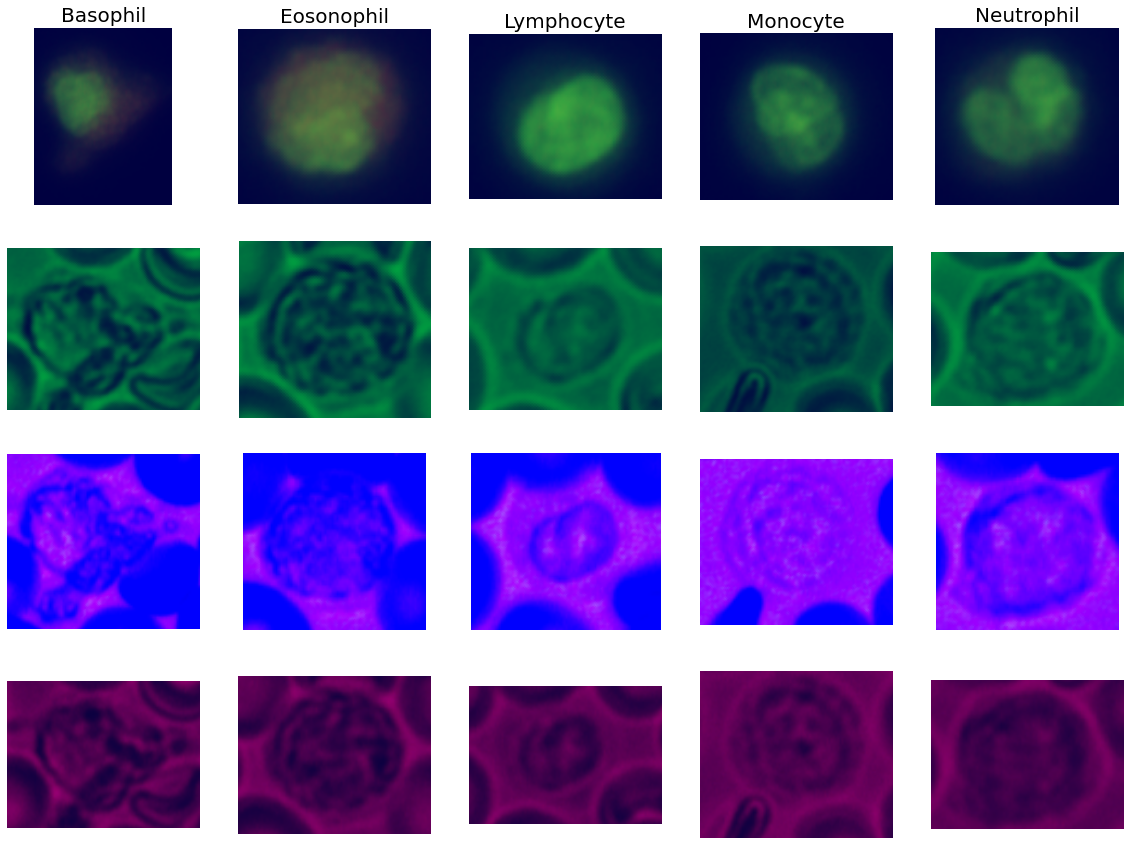

In [42]:
f, ax = plt.subplots(4,5, figsize=(20,15))
plt.axis('off')
for i,label in enumerate(["Basophil", "Eosonophil", "Lymphocyte", "Monocyte", "Neutrophil"]):
    for j,colour in enumerate(["Fluor","Green","Purple","Red"]):
    x = df[df["Fluor"].str.contains(label)].iloc[0]
    for j in range(4):
        f_path = x[j+2]
        img = Image.open(str(f_path))
        colourblend = Image.new('RGB', img.size, 'blue')
        blended = Image.blend(img, colourblend, 0.25)
        ax[j,i].imshow(blended)
        ax[j,i].axis('off')
        if j == 0:
            ax[j,i].set_title(label, fontsize=20)

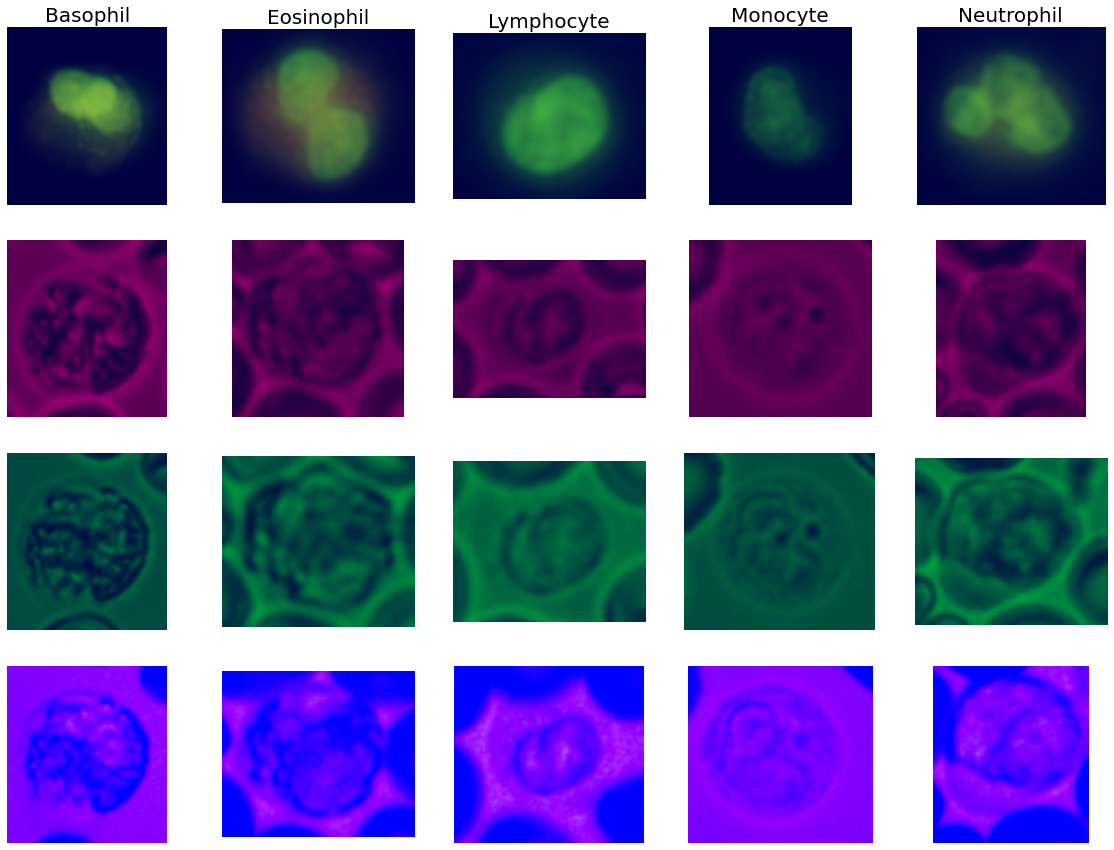

In [48]:
f, ax = plt.subplots(4,5, figsize=(20,15))
for i,(cell, cell_name) in enumerate(zip([Basophil, Eosinophil, Lymphocyte, Monocyte, Neutrophil],["Basophil", "Eosinophil", "Lymphocyte", "Monocyte", "Neutrophil"])):
    for j,colour in enumerate(cell):
        img = Image.open(colour)
        colourblend = Image.new('RGB', img.size, 'blue')
        blended = Image.blend(img, colourblend, 0.25)
        ax[j,i].imshow(blended)
        ax[j,i].axis('off')
        if j == 0:
            ax[j,i].set_title(cell_name, fontsize=20)

In [49]:
bas = "C:/Users/zarre/OneDrive/University/2022 S1/FYP/Figures/Sample Images/bas.png"
eos = "C:/Users/zarre/OneDrive/University/2022 S1/FYP/Figures/Sample Images/eos.png"
lym = "C:/Users/zarre/OneDrive/University/2022 S1/FYP/Figures/Sample Images/lym.png"
mon = "C:/Users/zarre/OneDrive/University/2022 S1/FYP/Figures/Sample Images/mon.png"
neu = "C:/Users/zarre/OneDrive/University/2022 S1/FYP/Figures/Sample Images/neut.png"

Text(0.5, 1.0, 'Neutrophil')

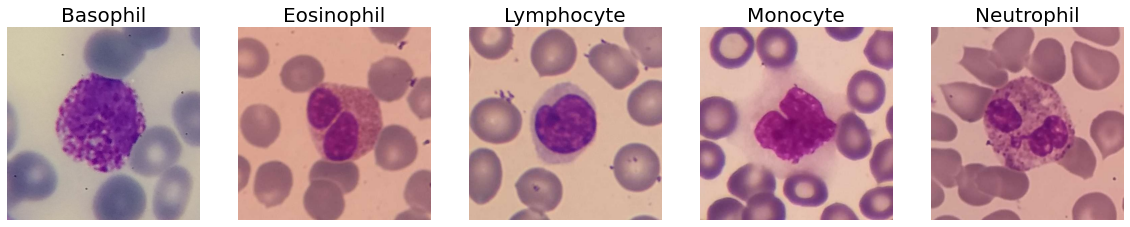

In [55]:
f, ax = plt.subplots(1,5, figsize=(20,4))
img = Image.open(bas)
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Basophil', fontsize=20)
img = Image.open(eos)
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title('Eosinophil', fontsize=20)
img = Image.open(lym)
ax[2].imshow(img)
ax[2].axis('off')
ax[2].set_title('Lymphocyte', fontsize=20)
img = Image.open(mon)
ax[3].imshow(img)
ax[3].axis('off')
ax[3].set_title('Monocyte', fontsize=20)
img = Image.open(neu)
ax[4].imshow(img)
ax[4].axis('off')
ax[4].set_title('Neutrophil', fontsize=20)

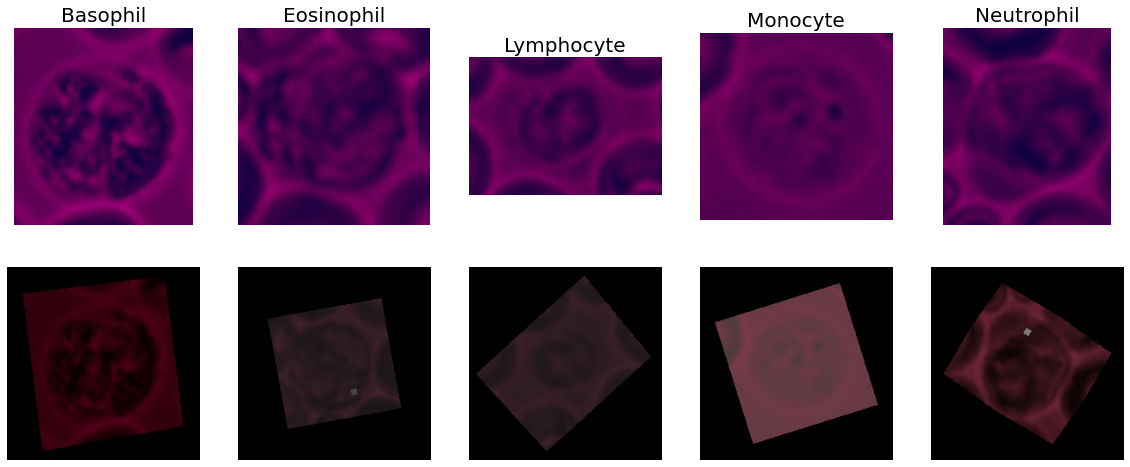

In [81]:
train_data_transform = transforms.Compose(
    [
        RandAugment(3, 5),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(180),
    ]
)

f, ax = plt.subplots(2,5, figsize=(20,8))
for i,(cell, cell_name) in enumerate(zip([Basophil, Eosinophil, Lymphocyte, Monocyte, Neutrophil],["Basophil", "Eosinophil", "Lymphocyte", "Monocyte", "Neutrophil"])):
    img = Image.open(cell[1])
    colourblend = Image.new('RGB', img.size, 'blue')
    blended = Image.blend(img, colourblend, 0.25)
    ax[0,i].imshow(blended)
    ax[0,i].axis('off')
    ax[0,i].set_title(cell_name, fontsize=20)
    transformed_img = train_data_transform(img)
    ax[1,i].imshow(transformed_img)
    ax[1,i].axis('off')

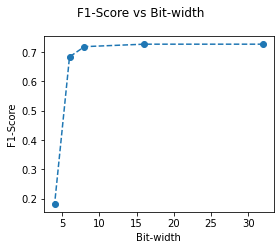

In [100]:
title = 'F1-Score vs Bit-width'
f = "C:\FYP\hematology\plot_data\wandb_export_2022-05-28T14_21_35.508+10_00.csv"
plt.rcParams["figure.figsize"] = [4, 3.5]
plt.rcParams["figure.autolayout"] = True
columns = ["bit_width","Results.macro avg.f1-score"]
plotdata = pd.read_csv(f, usecols=columns)
fig = plt.figure()
plt.plot(plotdata[columns[0]], plotdata[columns[1]], linestyle='--',  marker='o')
fig.suptitle(title)
plt.xlabel('Bit-width')
plt.ylabel('F1-Score')
fig.savefig(f'plot_data/r_{title}.png')

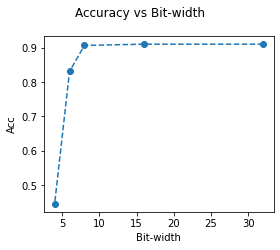

In [99]:
title = 'Accuracy vs Bit-width'
f = "C:\FYP\hematology\plot_data\wandb_export_2022-05-28T14_37_41.315+10_00.csv"
plt.rcParams["figure.figsize"] = [4, 3.5]
plt.rcParams["figure.autolayout"] = True
columns = ["bit_width","Results.accuracy"]
plotdata = pd.read_csv(f, usecols=columns)
fig = plt.figure()
plt.plot(plotdata[columns[0]], plotdata[columns[1]], linestyle='--',  marker='o')
fig.suptitle(title)
plt.xlabel('Bit-width')
plt.ylabel('Acc')
fig.savefig(f'plot_data/r_{title}.png')

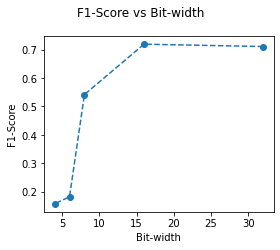

In [101]:
title = 'F1-Score vs Bit-width'
f = "plot_data\wandb_export_2022-05-28T15_02_08.059+10_00.csv"
plt.rcParams["figure.figsize"] = [4, 3.5]
plt.rcParams["figure.autolayout"] = True
columns = ["bit_width","Results.macro avg.f1-score"]
plotdata = pd.read_csv(f, usecols=columns)
fig = plt.figure()
plt.plot(plotdata[columns[0]], plotdata[columns[1]], linestyle='--',  marker='o')
fig.suptitle(title)
plt.xlabel('Bit-width')
plt.ylabel('F1-Score')
fig.savefig(f'plot_data/m_{title}.png')

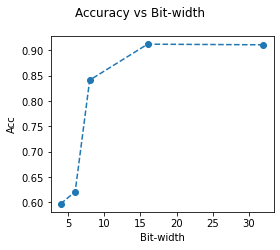

In [102]:
title = 'Accuracy vs Bit-width'
f = "plot_data\wandb_export_2022-05-28T15_14_57.718+10_00.csv"
plt.rcParams["figure.figsize"] = [4, 3.5]
plt.rcParams["figure.autolayout"] = True
columns = ["bit_width","Results.accuracy"]
plotdata = pd.read_csv(f, usecols=columns)
fig = plt.figure()
plt.plot(plotdata[columns[0]], plotdata[columns[1]], linestyle='--',  marker='o')
fig.suptitle(title)
plt.xlabel('Bit-width')
plt.ylabel('Acc')
fig.savefig(f'plot_data/m_{title}.png')

C:\Users\zarre\AppData\Local\Temp\ipykernel_45196\1411456628.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'plot_data/{title}.png', bbox_inches="tight")
c:\Users\zarre\.conda\envs\pyt-gpu\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


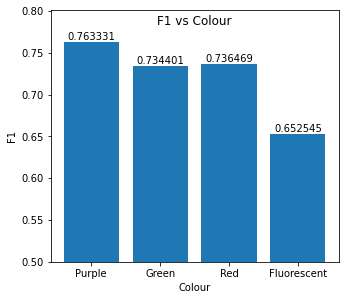

In [126]:
title = 'F1 vs Colour'
plt.rcParams["figure.figsize"] = [4, 3.5]
plt.rcParams["figure.autolayout"] = True
f= "plot_data\wandb_export_2022-05-28T16_07_33.281+10_00.csv"
fig = plt.figure()
# columns = ["bit_width","Results.accuracy"]
plotdata = list(dict.fromkeys(pd.read_csv(f).values.tolist()[0]))[1:]
ax = fig.add_axes([0,0,1,1])
colours = ['Purple','Green','Red','Fluorescent']
bars = ax.bar(colours, plotdata)
ax.bar_label(bars)
plt.ylim((0.5))
fig.suptitle(title)
plt.xlabel('Colour')
plt.ylabel('F1')
plt.savefig(f'plot_data/{title}.png', bbox_inches="tight")